# Import dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
# pickle is used to open the data ie for serilization of the data

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train,y_train=train['features'],train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# Image prep

2

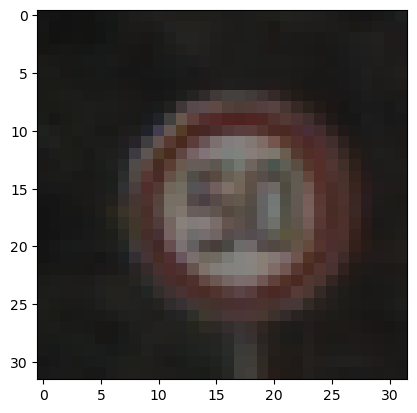

In [12]:
i=31718
plt.imshow(X_train[i])
y_train[i]

30

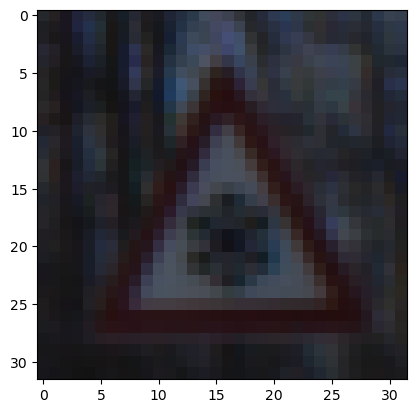

In [13]:
i=3171
plt.imshow(X_validation[i])
y_validation[i]

8

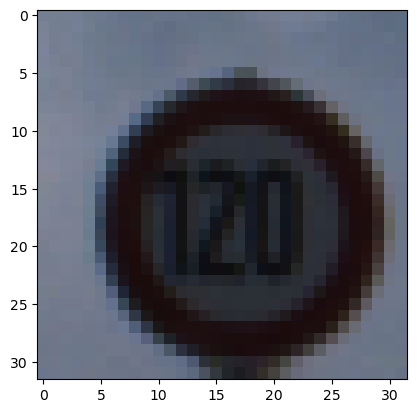

In [15]:
i=3171
plt.imshow(X_test[i])
y_test[i]

# Data Prep

In [16]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [ ]:
# convert the coloured images to grey image

In [20]:
X_train_grey=np.sum(X_train/3,axis=3,keepdims=True)
X_test_grey=np.sum(X_test/3,axis=3,keepdims=True)
X_validation_grey=np.sum(X_validation/3,axis=3,keepdims=True)

In [19]:
X_train_grey.shape

(34799, 32, 32, 1)

In [21]:
X_test_grey.shape

(12630, 32, 32, 1)

In [22]:
X_validation_grey.shape

(4410, 32, 32, 1)

In [23]:
X_train_grey_norm=(X_train_grey-128)/128
X_test_grey_norm=(X_test_grey-128)/128
X_validation_grey_norm=(X_validation_grey-128)/128

In [24]:
X_train_grey_norm

array([[[[-0.75260417],
         [-0.75      ],
         [-0.74739583],
         ...,
         [-0.59114583],
         [-0.49479167],
         [-0.5078125 ]],

        [[-0.74479167],
         [-0.74479167],
         [-0.7421875 ],
         ...,
         [-0.38541667],
         [-0.35416667],
         [-0.54166667]],

        [[-0.73958333],
         [-0.73697917],
         [-0.74479167],
         ...,
         [ 0.04947917],
         [ 0.06770833],
         [-0.49739583]],

        ...,

        [[-0.69010417],
         [-0.71354167],
         [-0.73177083],
         ...,
         [-0.75      ],
         [-0.74739583],
         [-0.74479167]],

        [[-0.69010417],
         [-0.70572917],
         [-0.7265625 ],
         ...,
         [-0.75      ],
         [-0.74739583],
         [-0.74479167]],

        [[-0.6796875 ],
         [-0.703125  ],
         [-0.72916667],
         ...,
         [-0.7421875 ],
         [-0.73697917],
         [-0.7421875 ]]],


       [[[-0.13802083],


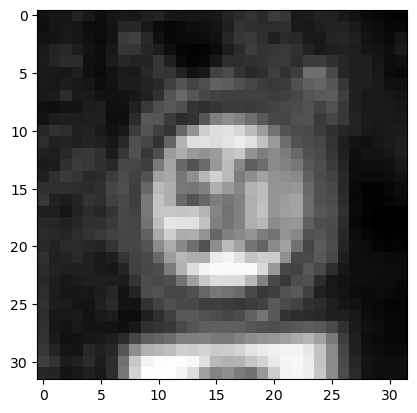

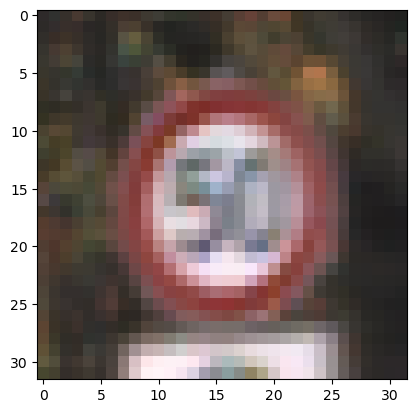

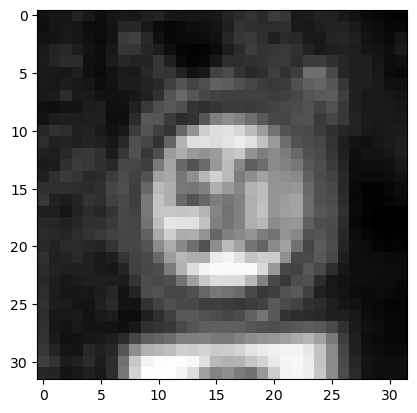

In [31]:
i=619
plt.imshow(X_train_grey[i].squeeze(),cmap='gray')# Squeeze is used to remove the 1 parameter from the shape
plt.figure()#To create a new figure below
plt.imshow(X_train[i])#Original figure
plt.figure()
plt.imshow(X_train_grey_norm[i].squeeze(),cmap='gray')#normalized gray image

# Model Training

In [ ]:
# output=(input-filter+1)/stride

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [34]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
#pooling
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
              
cnn_model.add(Dense(units=120,activation='relu'))
              
cnn_model.add(Dense(units=84,activation='relu'))
              
cnn_model.add(Dense(units=43,activation='softmax'))              


In [36]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [46]:
history=cnn_model.fit(X_train_grey_norm,y_train,batch_size=500,epochs=5,verbose=1,validation_data=(X_validation_grey_norm,y_validation))

Epoch 1/5
70/70 [==============================] - 8s 115ms/step - loss: 0.0309 - accuracy: 0.9943 - val_loss: 0.6733 - val_accuracy: 0.8741
Epoch 2/5
70/70 [==============================] - 8s 115ms/step - loss: 0.0256 - accuracy: 0.9953 - val_loss: 0.6836 - val_accuracy: 0.8776
Epoch 3/5
70/70 [==============================] - 8s 115ms/step - loss: 0.0275 - accuracy: 0.9947 - val_loss: 0.7396 - val_accuracy: 0.8714
Epoch 4/5
70/70 [==============================] - 8s 115ms/step - loss: 0.0234 - accuracy: 0.9955 - val_loss: 0.6924 - val_accuracy: 0.8823
Epoch 5/5
70/70 [==============================] - 8s 118ms/step - loss: 0.0195 - accuracy: 0.9967 - val_loss: 0.7349 - val_accuracy: 0.8753


# Model Evaluation

In [47]:
score=cnn_model.evaluate(X_test_grey_norm,y_test)
print('Test Accuracy{}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 1.0690 - accuracy: 0.8673
Test Accuracy0.8673000931739807


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

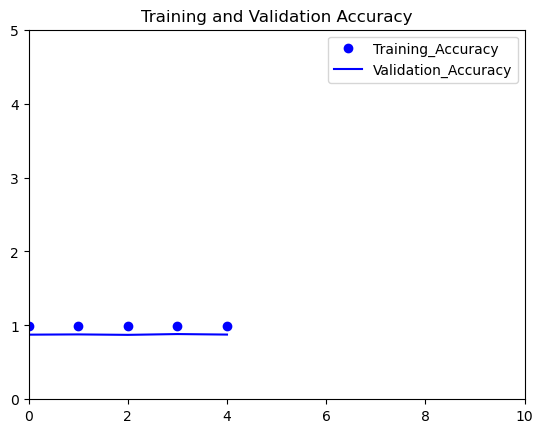

In [69]:
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training_Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation_Accuracy')
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.title('Training and Validation Accuracy')
plt.legend()

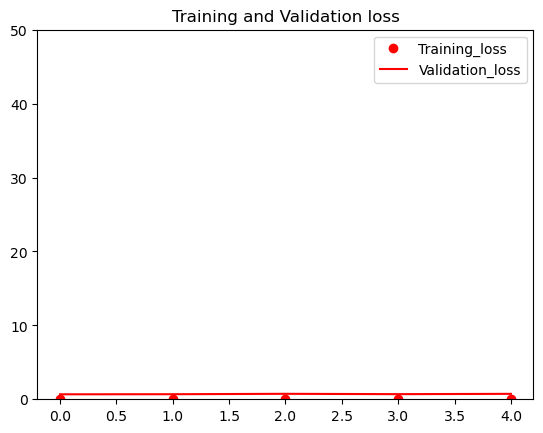

In [70]:
plt.plot(epochs,loss,'ro',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Validation_loss')
plt.title('Training and Validation loss')
plt.legend()

In [75]:
predicted_classes=np.argmax(cnn_model.predict(X_test_grey_norm),axis=1)

y_true=y_test

395/395 [==============================] - 3s 6ms/step


<AxesSubplot:>

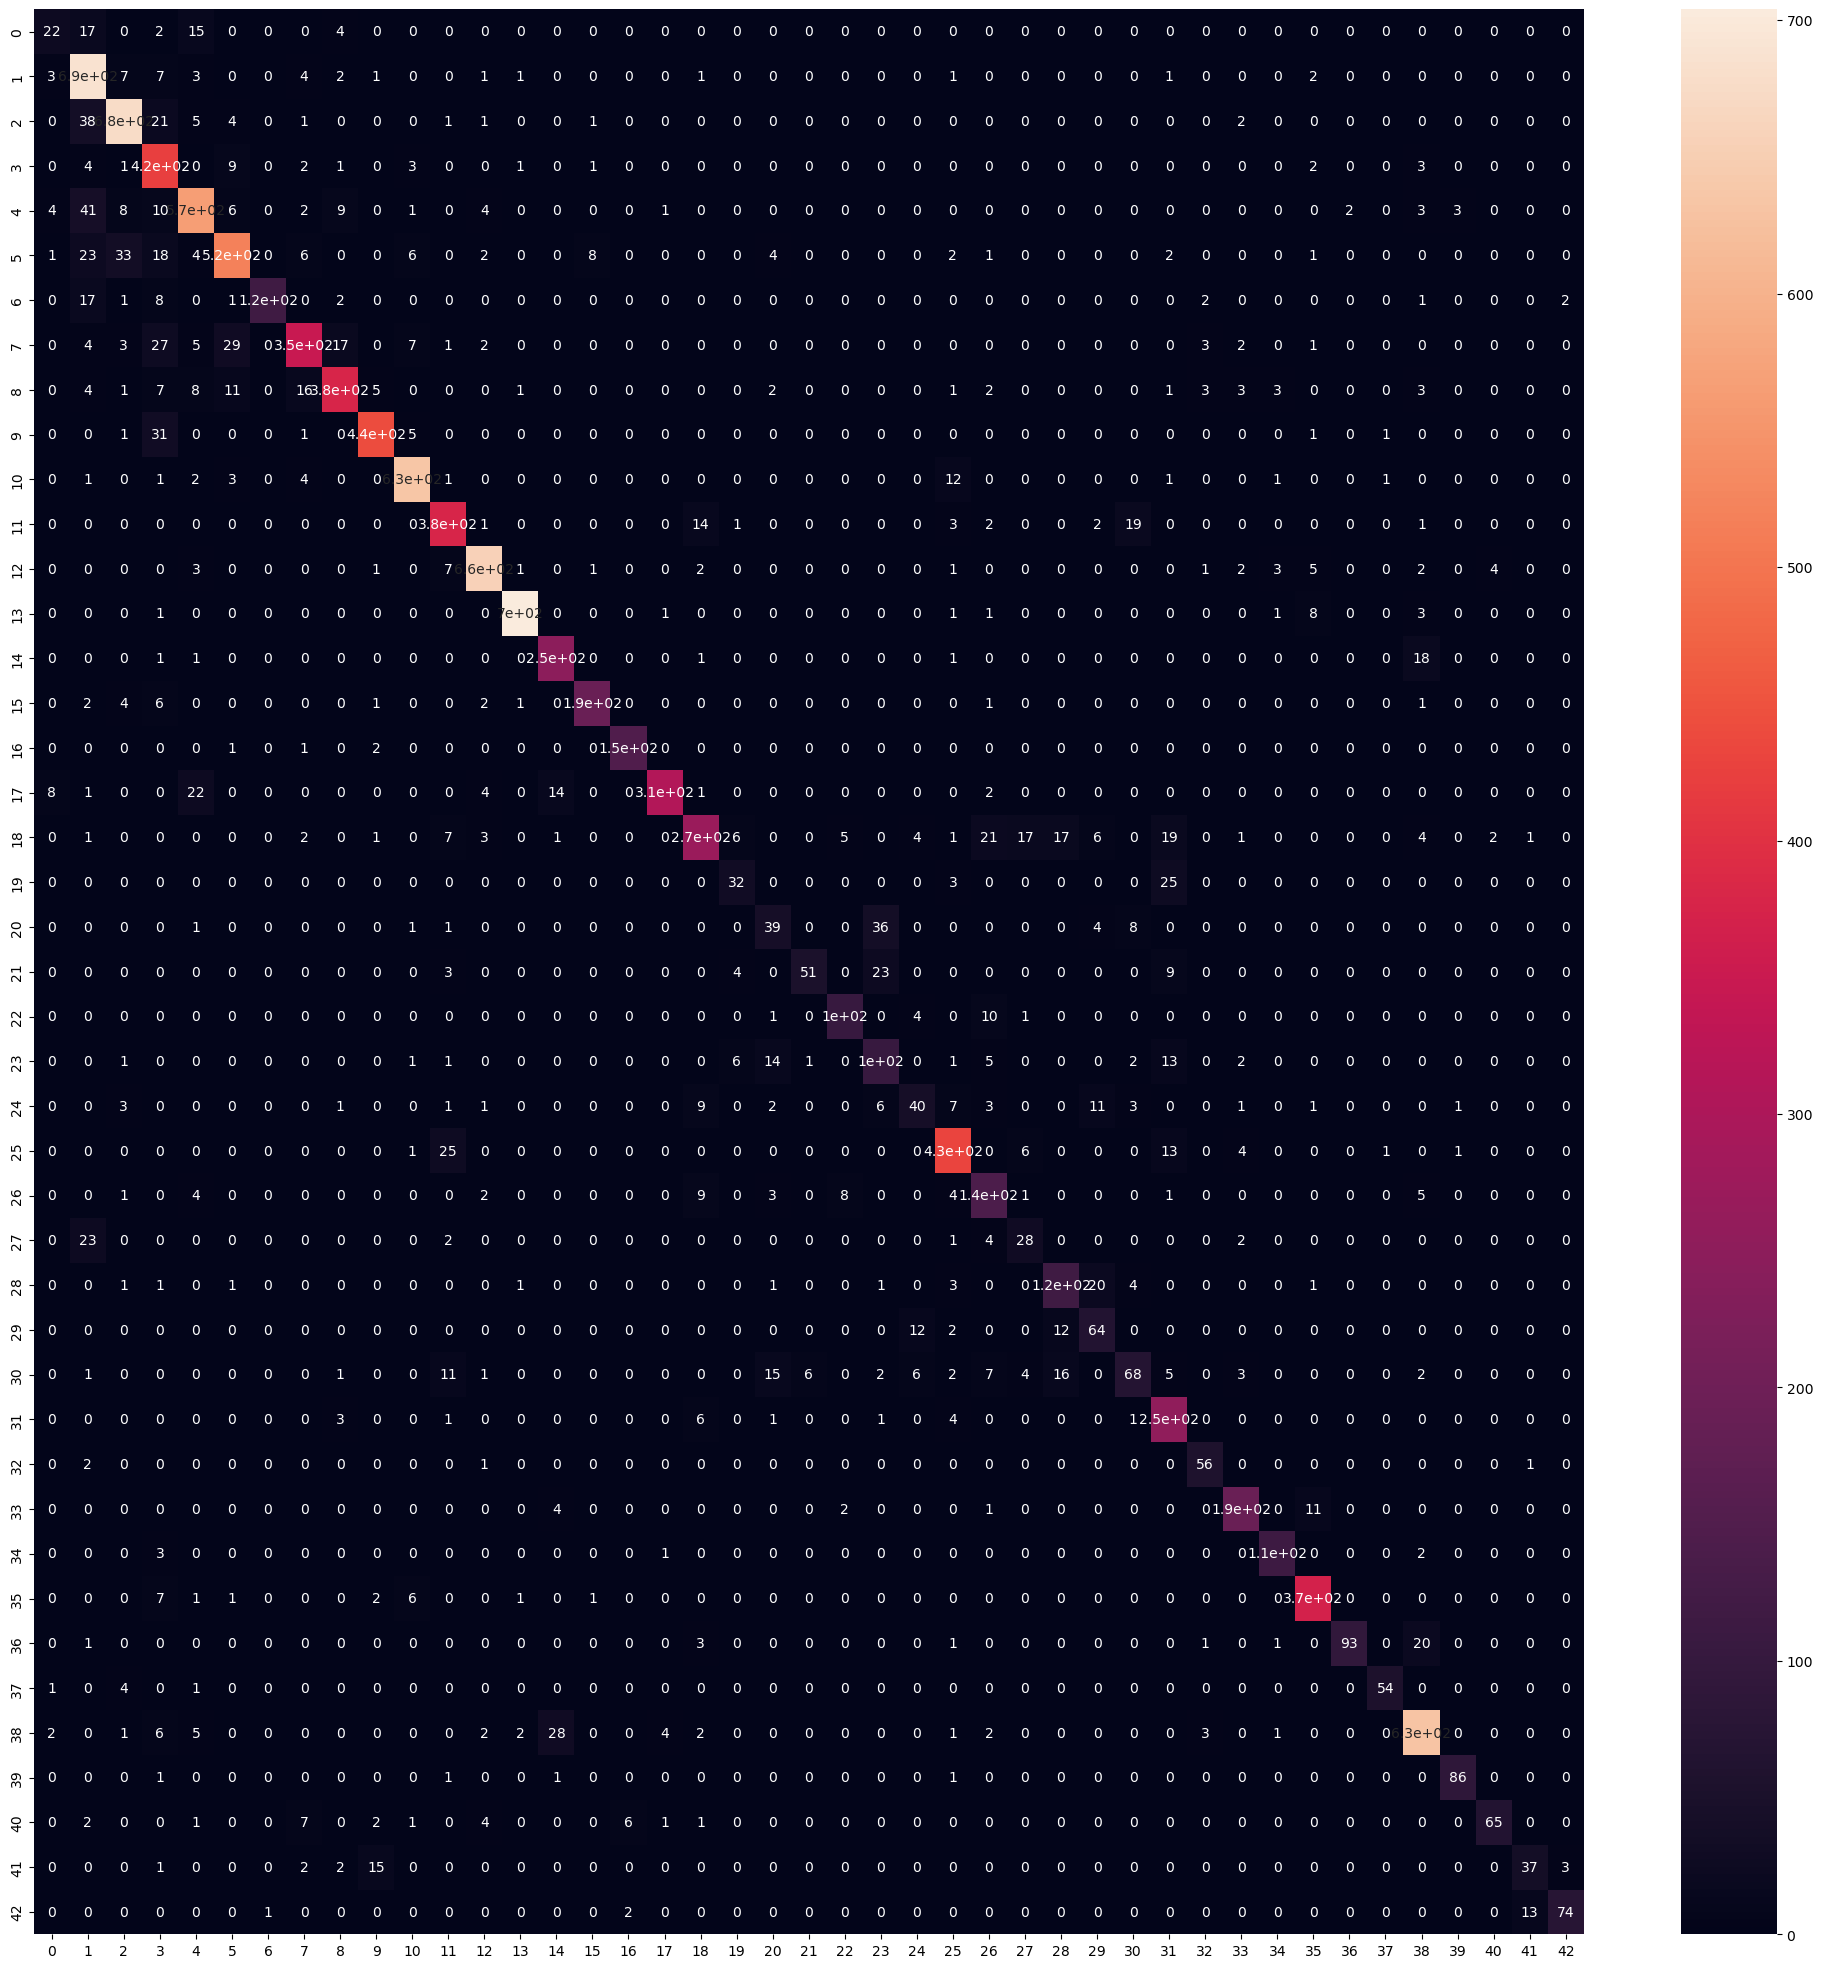

In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

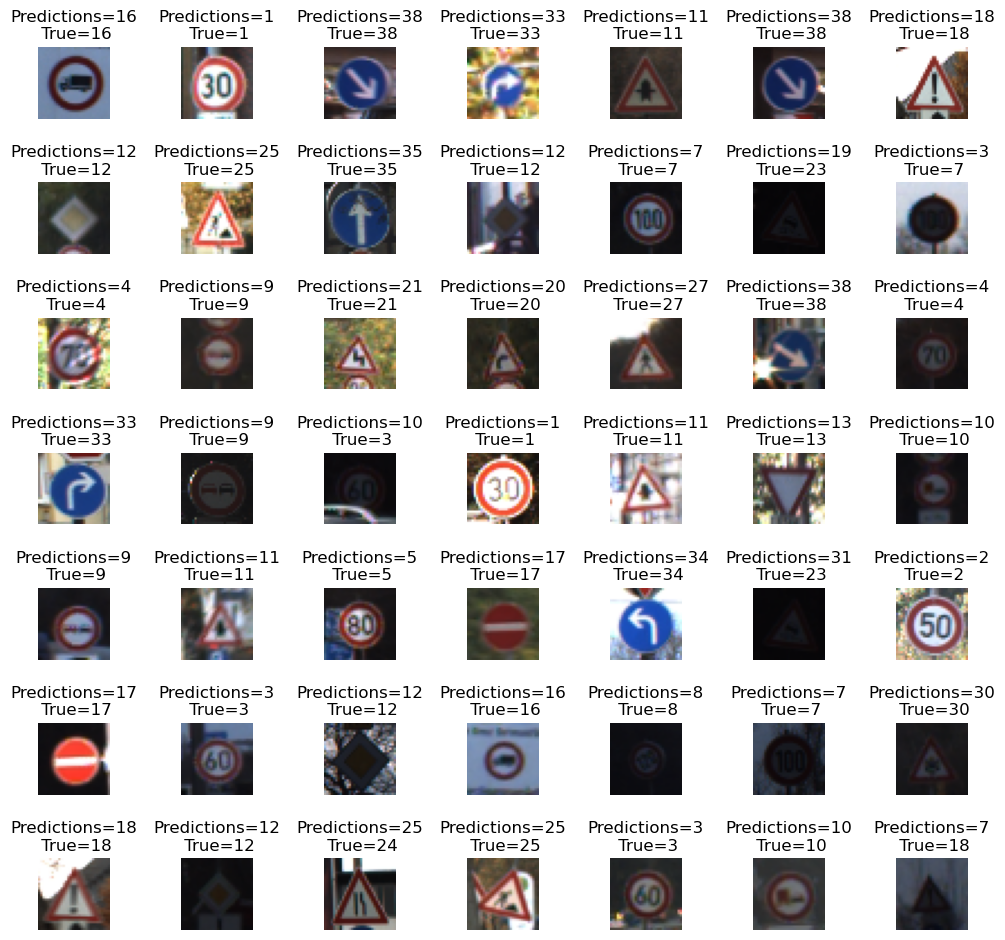

In [84]:
L=7
W=7

fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predictions={}\n True={}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)